# Exibição de informações dos parlamentares

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import csv


import os

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

## Carga de infos básicas. 

In [2]:
#!ls ../dados/tse/ibge

## Carga de parlamentares

In [3]:
#Dados de parlamentares
df_parlamentares=pd.read_csv("../dados/tse/detalhes_parlamentares.csv", 
                             encoding="Latin 1",
                             header=0)

In [5]:
#df_parlamentares.columns
#df_parlamentares.head()
#df_parlamentares.shape

## Carga de municipios e votação

In [6]:
#Dados de municípios
df_municipios=pd.read_csv("../dados/tse/detalhes_municipios.csv", encoding="Latin 1",header=0)


/home/carlos/anaconda3/envs/R/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#df_municipios.columns[18]
#df_municipios.head()
#f_municipios.shape

In [8]:
#df_municipios.columns[18]

In [9]:
df_municipios.drop(columns=["Unnamed: 0","RESULTADO_2018","RESULTADO_2014",
                            "DS_DETALHE_SITUACAO_CAND"], inplace=True)


In [11]:
#df_municipios.info()
#df_municipios.head()

## Consolidação de informações de votação

In [12]:
df_cpfs=df_parlamentares[["NR_CPF_CANDIDATO","SQ_CANDIDATO"]]
df_cpfs=df_cpfs.drop_duplicates(keep="first")
df_cpfs=df_cpfs.rename(columns={"NR_CPF_CANDIDATO":"CPF"})

In [14]:
df_municipios_votacao=pd.merge(df_municipios,df_cpfs, how="left", on="SQ_CANDIDATO")
#df_municipios_votacao.head()


In [15]:
#df_municipios_votacao.info()

## Carga de informações geograficas dos municípios

In [16]:
lista_uf=list(df_municipios_votacao["SG_UF"].unique())
df_mapa_brasil=pd.DataFrame()

In [17]:
for uf in lista_uf:
    diretorio="../dados/ibge/shapes/"+uf
    arquivos=os.listdir(diretorio)
    shapefile = [arq for arq in arquivos if ".shp" in arq][0]
    arq=diretorio+"/"+shapefile
    df_uf= gpd.read_file(arq)
    df_uf["SG_UF"]=uf
    df_mapa_brasil=pd.concat([df_mapa_brasil,df_uf])
    

In [19]:
#df_mapa_brasil.info()

In [20]:
df_mapa_brasil=df_mapa_brasil.astype({"CD_GEOCODM":"float64"})
df_mapa_brasil.rename(columns={"CD_GEOCODM":"CODIGO_IBGE"}, inplace=True)
#df_mapa_brasil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5567 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           5567 non-null   int64   
 1   CODIGO_IBGE  5567 non-null   float64 
 2   NM_MUNICIP   5567 non-null   object  
 3   geometry     5567 non-null   geometry
 4   SG_UF        5567 non-null   object  
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 261.0+ KB


In [ ]:
#df_mapa_brasil.head()

# Escolhe randomicamente um CPF e chama as funções

In [21]:
cpf=df_cpfs["CPF"].sample(n=1).iloc[0]
cpf

39154732867

In [22]:
df_cpf_votacao=df_municipios_votacao[df_municipios_votacao["CPF"]==cpf]
df_cpf=df_parlamentares[df_parlamentares["NR_CPF_CANDIDATO"]==cpf]
#df_cpf.info()
#df_cpf_votacao.info()

In [23]:
uf=df_cpf_votacao["SG_UF"].iloc[0]
nome=df_cpf["NM_URNA_CANDIDATO"].iloc[0]
#uf
#nome
df_cpf_municipios=df_mapa_brasil[df_mapa_brasil["SG_UF"]==uf]
#df_cpf_municipios.info()

'SP'

'SÃ\x82MIA BOMFIM'

In [24]:
#RJ=pd.merge(RJ, idhm, how="left", on="CD_GEOCODM")
df_cpf_municipios=pd.merge(df_cpf_municipios,df_cpf_votacao, how="left", on="CODIGO_IBGE")
#df_cpf_municipios.info()

In [25]:
#df_cpf_municipios.plot()

Text(0.5, 1, 'SP - IDHM Municípios')

(-53.55754884999401,
 -43.71392784606257,
 -25.588954206885976,
 -19.503022540302517)

(-53.55754884999401,
 -43.71392784606257,
 -25.588954206885976,
 -19.503022540302517)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


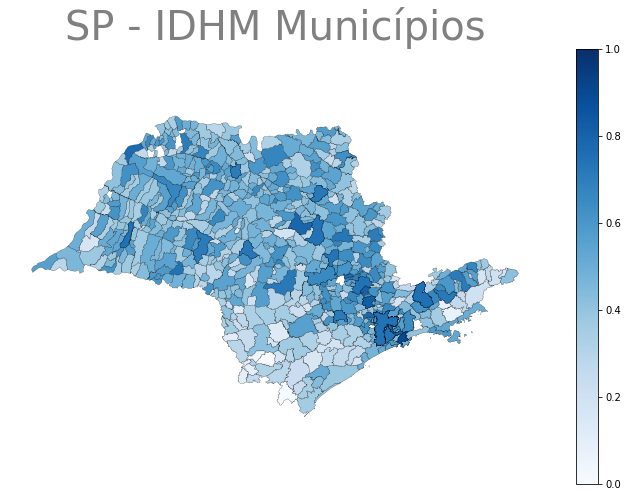

In [26]:
# Plot estado e indicador IDHM
indicador="IDHM_2010"
titulo=uf+" - "+"IDHM Municípios"
vmin=0
vmax=1

fig, ax = plt.subplots(figsize=(12,8)) # 1
df_cpf_municipios.plot(ax=ax, column=indicador, cmap="Blues", edgecolor="black", linewidth=0.2) # 2
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmax, vmax=vmin))
sm._A = []
cbar = fig.colorbar(sm)
plt.title(titulo, fontsize=40, fontname="Palatino Linotype", color="grey") # 3
ax.axis('off') # 4
plt.axis("equal") # 5
plt.show() # 6

Text(0.5, 1, 'SÃ\x82MIA BOMFIM - Votos por município')

(-53.55754884999401,
 -43.71392784606257,
 -25.588954206885976,
 -19.503022540302517)

(-53.55754884999401,
 -43.71392784606257,
 -25.588954206885976,
 -19.503022540302517)

/home/carlos/anaconda3/envs/R/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/carlos/anaconda3/envs/R/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


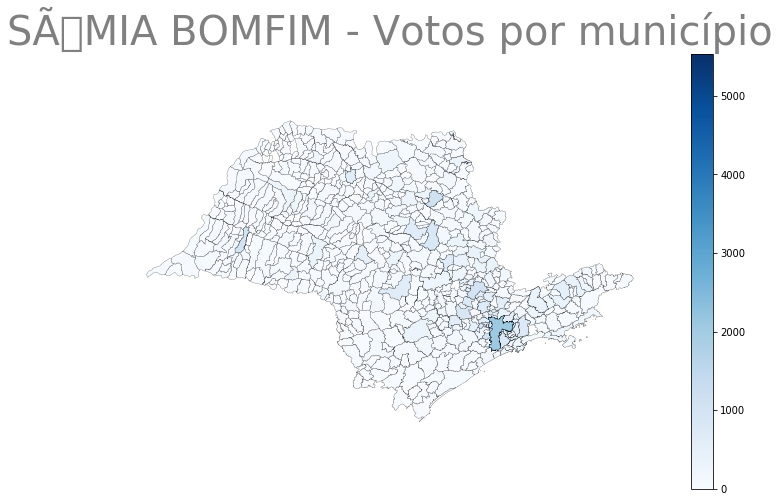

In [27]:
indicador="QT_VOTOS_NOMINAIS"
titulo=nome+" - "+"Votos por município"
vmin=0
vmax=df_cpf_municipios[indicador].max()

fig, ax = plt.subplots(figsize=(12,8)) # 1
df_cpf_municipios.plot(ax=ax, column=indicador, cmap="Blues", edgecolor="black", linewidth=0.2) # 2
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmax, vmax=vmin))
sm._A = []
cbar = fig.colorbar(sm)
plt.title(titulo, fontsize=40, fontname="Palatino Linotype", color="grey") # 3
ax.axis('off') # 4
plt.axis("equal") # 5
plt.show() # 6

In [28]:
df_cpf_municipios.columns
df_municipios=df_cpf_municipios.sort_values("NM_MUNICIPIO").head()
df_cpf_municipios.shape

Index(['ID', 'CODIGO_IBGE', 'NM_MUNICIP', 'geometry', 'SG_UF_x', 'ANO_ELEICAO',
       'SG_UF_y', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'DS_CARGO', 'SQ_CANDIDATO',
       'QT_VOTOS_NOMINAIS', 'MUNICIPIO', 'Espacialidades', 'IDHM_2010',
       'IDHM_RENDA_2010', 'IDHM_LONGEV_2010', 'IDHM_EDUC_2010', 'SIGLA',
       'CPF'],
      dtype='object')

(779, 20)

In [29]:
df_cpf_votacao=df_cpf_municipios[["NM_MUNICIP","QT_VOTOS_NOMINAIS"]].sort_values("QT_VOTOS_NOMINAIS", 
                                                                                 ascending=False)

In [30]:
df_cpf_votacao.head(10)
df_cpf_votacao.shape

,NM_MUNICIP,QT_VOTOS_NOMINAIS
660,SÃO PAULO,5532.0
678,SÃO PAULO,5330.0
630,SÃO PAULO,4224.0
667,SÃO PAULO,3997.0
685,SÃO PAULO,3737.0
643,SÃO PAULO,3656.0
636,SÃO PAULO,3422.0
686,SÃO PAULO,3150.0
681,SÃO PAULO,3044.0
638,SÃO PAULO,2710.0


(779, 2)

In [31]:
total=df_cpf_votacao["QT_VOTOS_NOMINAIS"].sum()
df_cpf_votacao["PERCENT"]=df_cpf_votacao["QT_VOTOS_NOMINAIS"]/total

In [32]:
df_cpf_votacao.head()
df_cpf_votacao.shape
total

,NM_MUNICIP,QT_VOTOS_NOMINAIS,PERCENT
660,SÃO PAULO,5532.0,0.022315
678,SÃO PAULO,5330.0,0.021500
630,SÃO PAULO,4224.0,0.017039
667,SÃO PAULO,3997.0,0.016123
685,SÃO PAULO,3737.0,0.015074


(779, 3)

247909.0

In [ ]:
import streamlit as st